## Text Analytics - MsC Data Science (part time) 24' | 4th Assignement


# Part-of-Speech Tagger Development Project | CNN



### Based on universal dependencies

Alphabetical listing:

- **ADJ**: adjective
- **ADP**: adposition
- **ADV**: adverb
- **AUX**: auxiliary
- **CCONJ**: coordinating conjunction
- **DET**: determiner
- **INTJ**: interjection
- **NOUN**: noun
- **NUM**: numeral
- **PART**: particle
- **PRON**: pronoun
- **PROPN**: proper noun
- **PUNCT**: punctuation
- **SCONJ**: subordinating conjunction
- **SYM**: symbol
- **VERB**: verb
- **X**: other


## Installing required libraries

- pyconll, a low level wrapper around the CoNLL-U format.
- fasttext, a library of the selected pretrained tokenizer model

In [ ]:
!pip install google
!pip install pyconll
!pip install fasttext-wheel
!pip install torchsummary

/bin/bash: /home/jason-server/miniconda3/envs/ta/lib/libtinfo.so.6: no version information available (required by /bin/bash)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 617.8 kB/s eta 0:00:000:00:01
/bin/bash: /home/jason-server/miniconda3/envs/ta/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/jason-server/miniconda3/envs/ta/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Using cached pybind11-2.12.0-py3-none-any.whl.metadata (9.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 4.8 MB/s eta 0:00:0000:0100:01
Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
/bin/bash: /home/jason-server/miniconda3/envs/ta/lib/libtinfo.so.6: no version information available (required by /bin/bash)


## Downloading the Universal Dependencies treebanks dataset

In [ ]:
!pip install fasttext-wheel

/bin/bash: /home/jason-server/miniconda3/envs/ta/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Using cached fasttext_wheel-0.9.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (16 kB)
Using cached fasttext_wheel-0.9.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.4 MB)


In [ ]:
import os
import fasttext.util
import numpy as np
import pyconll
from tensorflow.keras.layers import TextVectorization
from tqdm import tqdm

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
print(IN_COLAB)


greek_pretrained_model_path = 'wiki.el.bin'
if IN_COLAB:
    !apt-get install wget
    !wget -O ud-treebanks-v2.13.tgz https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-5287/ud-treebanks-v2.13.tgz?sequence=1&isAllowed=y
    !tar -xvf  'ud-treebanks-v2.13.tgz'
    local_dir = 'ud-treebanks-v2.13/UD_Greek-GUD/el_gud-ud-train.conllu'

    !wget -O wiki.el.zip https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.el.zip
    # Unzip the file
    import zipfile
    with zipfile.ZipFile("wiki.el.zip", 'r') as zip_ref:
      zip_ref.extractall("/content/")
else:

    local_dir = os.getcwd() + '\\data\\UD_Greek-GUD\\el_gud-ud-train.conllu'

print(local_dir)

2024-06-06 22:41:01.274747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 22:41:01.920817: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/jason-server/miniconda3/envs/ta/lib/
2024-06-06 22:41:01.920934: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/jason-server/miniconda3/envs/ta/lib/
2024-06-06 22:41:01.920942: W tensorflow/c

False
/tmp/pycharm_project_389/assignment_2\data\UD_Greek-GUD\el_gud-ud-train.conllu


In [ ]:
local_dir = os.getcwd() + '/data/UD_Greek-GUD/el_gud-ud-train.conllu'

### Selection of a pre trained word embedding model

- Facebook's fasttext was selected, a pre-trained word vectors for 157 languages, trained on Common Crawl and Wikipedia.
- We download the pretrained tokenizer model for the Greek language. [here] (https://fasttext.cc/docs/en/pretrained-vectors.html)
- We can reduce the dimensionality if  it is our intention



In [ ]:
reduce_dim = None # 100
ft = fasttext.load_model('wiki.el.bin')

if reduce_dim:
    fasttext.util.reduce_model(ft, 100)

ft.get_dimension()

300

In [ ]:
ft.get_dimension()

300

In [ ]:
test_word = 'γεια'
embedding = ft.get_word_vector(test_word)
print('word embeding: ', embedding)
print('Shape: ', embedding.shape)
print('Datatype: ', type(embedding))

word embeding:  [-2.01471373e-01 -8.19069967e-02 -6.30714357e-01  2.38028705e-01
  1.61352232e-01 -8.11730027e-02 -2.05985248e-01 -2.46288344e-01
  5.96133694e-02  3.13241690e-01  3.22496504e-01  2.58694142e-01
  1.99632481e-01  8.49099040e-01 -2.67637640e-01  1.09031834e-01
 -3.11452687e-01 -1.06538177e-01 -1.31129831e-01  1.24932252e-01
  4.69173700e-01  3.44497800e-01  2.88675010e-01 -3.31103563e-01
  5.76218724e-01 -5.36351018e-02 -1.93529874e-01  2.41987929e-01
  2.48569950e-01  2.41300315e-01 -1.72507957e-01  3.42797726e-01
 -1.35118723e-01 -1.63847357e-01 -1.06282175e-01 -3.98298241e-02
  1.52835688e-02 -2.01351345e-01  1.09172486e-01  2.81961143e-01
 -7.34199211e-03  3.00695121e-01  2.56839078e-02  1.65734693e-01
 -2.66208798e-01  4.67981130e-01 -9.00609195e-02  4.80905294e-01
  7.41786361e-01 -4.58357424e-01  5.10946214e-02 -1.52716622e-01
  1.78740844e-02  4.78239328e-01  8.06253552e-01  1.49014872e-02
 -1.89630315e-01 -3.26926708e-01 -3.95542413e-01  1.00748032e-01
 -4.40441

### We check that the model has embedded "close" words together

In [ ]:
ft.get_nearest_neighbors('για',k=20)

[(0.5487291812896729, 'και'),
 (0.5428105592727661, 'επίσης,'),
 (0.5265333652496338, 'να'),
 (0.5225803852081299, 'προκειμένου'),
 (0.5152628421783447, 'σκοπό'),
 (0.5148484706878662, 'αλλά'),
 (0.5075995922088623, 'καθώς'),
 (0.506814181804657, '–για'),
 (0.4949963688850403, 'την'),
 (0.4937067925930023, 'σe'),
 (0.4928421080112457, 'που'),
 (0.4921763837337494, 'φτφ/nfgr'),
 (0.490660160779953, 'αυτός/ή'),
 (0.4868979752063751, 'χρησιμεύοντας'),
 (0.4801228940486908, '•\xa0\xa0'),
 (0.4787537157535553, 'όμως'),
 (0.4763149917125702, 'όμως,'),
 (0.4758837819099426, ',επίσης'),
 (0.47420328855514526, 'χρειαζόνταν'),
 (0.4724831283092499, 'επίσης')]

In [ ]:
# Iterate over vocabulary to find the most similar word
best_similarity = -1
best_word = None

for word in ft.get_words():
    word_embedding = ft.get_word_vector(word)
    similarity = np.dot(embedding, word_embedding) / (np.linalg.norm(embedding) * np.linalg.norm(word_embedding))
    if similarity > best_similarity:
        best_similarity = similarity
        best_word = word

print('Original word:', test_word)
print('Most similar word:', best_word)
print('Cosine similarity:', best_similarity)

NameError: name 'embedding' is not defined

## Utilizing the fasttext model to create the datasets to be used in the MLP

In [ ]:
# Step 1: Read CoNLL-U formatted file
def read_dataset(file_path, limit_sentences=None) -> list:
    """Read a CoNLL-U formatted file and return a list of sentences, where each sentence is a list of words.
    :param file_path: path to the CoNLL-U formatted file
    :param limit_sentences: limit the number of sentences to read (useful for debugging)
    :return: list of sentences, where each sentence is a list of words"""
    # Loading the file
    data = pyconll.load_from_file(file_path)
    sentences = []

    data_to_load = data[0:limit_sentences] if limit_sentences is not None else data
    # Iterating over each sentence
    for sentence in data_to_load:
        # Spliting the sentence to words
        words = [token.form for token in sentence]

        # Retrieving the POS of each words (Y)
        tags = [token.upos for token in sentence]

        # Saving for each data point of the dataset
        sentences.append({'words': words, 'tags': tags})
    return sentences

In [ ]:
# Step 1: Read data
data = read_dataset(local_dir)
print(len(data))
data

1071


[{'words': ['Τον',
   'διαβεβαιώνω',
   'ότι',
   'δεν',
   'πρόκειται',
   'να',
   'δημοσιοποιηθεί',
   'από',
   'τη',
   'δική',
   'μας',
   'υπηρεσία',
   'και',
   'κλείνουμε',
   '.'],
  'tags': ['PRON',
   'VERB',
   'SCONJ',
   'PART',
   'VERB',
   'SCONJ',
   'VERB',
   'ADP',
   'DET',
   'ADJ',
   'PRON',
   'NOUN',
   'CCONJ',
   'VERB',
   'PUNCT']},
 {'words': ['Τη', 'ρωτάω', 'πάλι', '.'],
  'tags': ['PRON', 'VERB', 'ADV', 'PUNCT']},
 {'words': ['Όσο',
   'και',
   'αν',
   'χαίρομαι',
   'που',
   'βλέπω',
   'την',
   'κόρη',
   'μου',
   'με',
   'τον',
   'Φάνη',
   'και',
   'τη',
   'Μάνια',
   'με',
   'τον',
   'Ούλι',
   ',',
   'η',
   'πρώτη',
   'μου',
   'αντίδραση',
   'είναι',
   'να',
   'τους',
   'πω',
   '«',
   'καληνύχτα',
   '»',
   'και',
   'να',
   'πάω',
   'για',
   'ύπνο',
   '.'],
  'tags': ['ADV',
   'CCONJ',
   'SCONJ',
   'VERB',
   'SCONJ',
   'VERB',
   'DET',
   'NOUN',
   'PRON',
   'ADP',
   'DET',
   'PROPN',
   'CCONJ',
   'DET',


## Here is how we would work with a vectorizer.
### It is implemented in the last part of the excersise just for practising purposes

### Based on the evaluation of the previous excersise

Comment: " A context window of size 2 should consider the 2 previous and the 2 next tokens in the sentence if they exist(e.g for the first token in the sentence you get only the 2 next ones since no previous token(s) exist, for the second token in the sentence the 1 previous and the 2 next, for the last token in the sentence only the 2 previous tokens since there are no next tokens etc). In your implementation you used only left context since you consider only the previous tokens"

In [ ]:
def create_context_windows_from_sentence(sentence: list, tags: list, window_size: int = 5) -> list:
    """Create context windows from a sentence. Each window will contain the words and tags within the window_size.
    :param sentence: list of words in the sentence
    :param tags: list of tags for each word in the sentence
    :param window_size: size of the context window

    :return: list of dictionaries, where each dictionary contains the original data, vectorized data, class, and word to classify for a given window"""
    # Ensure window_size is odd
    if window_size % 2 == 0:
        raise ValueError("Window size must be an odd number.")

    input_windows = []

    # Calculate the padding needed for the start and end of the sentence
    padding = window_size // 2

    # Add padding to the start and end of the sentence
    padded_sentence = [''] * padding + sentence + [''] * padding
    padded_tags = [''] * padding + tags + [''] * padding

    # Iterate over the sentence to create windows
    for i in range(padding, len(sentence) + padding):
        # Determine the start and end indices for the window
        start_index = i - padding
        end_index = i + padding + 1

        # Create the window
        window = padded_sentence[start_index:end_index]
        window_tags = padded_tags[start_index:end_index]

        # Vectorize the window
        vectorized_window = [ft.get_word_vector(word) for word in window]

        # Append the window data and class
        input_windows.append({
            'original_data': window,
            'vectorized_data': vectorized_window,
            'class': window_tags[padding],
            'word_to_classify': sentence[i - padding]
        })

    return input_windows

### Displaying a sample of the transformed data

In [ ]:
test = create_context_windows_from_sentence(sentence=data[0]['words'], tags=data[0]['tags'], window_size=5)
len(test), [x['original_data'] for x in test], test[0]['vectorized_data'][0].shape

(15,
 [['', '', 'Τον', 'διαβεβαιώνω', 'ότι'],
  ['', 'Τον', 'διαβεβαιώνω', 'ότι', 'δεν'],
  ['Τον', 'διαβεβαιώνω', 'ότι', 'δεν', 'πρόκειται'],
  ['διαβεβαιώνω', 'ότι', 'δεν', 'πρόκειται', 'να'],
  ['ότι', 'δεν', 'πρόκειται', 'να', 'δημοσιοποιηθεί'],
  ['δεν', 'πρόκειται', 'να', 'δημοσιοποιηθεί', 'από'],
  ['πρόκειται', 'να', 'δημοσιοποιηθεί', 'από', 'τη'],
  ['να', 'δημοσιοποιηθεί', 'από', 'τη', 'δική'],
  ['δημοσιοποιηθεί', 'από', 'τη', 'δική', 'μας'],
  ['από', 'τη', 'δική', 'μας', 'υπηρεσία'],
  ['τη', 'δική', 'μας', 'υπηρεσία', 'και'],
  ['δική', 'μας', 'υπηρεσία', 'και', 'κλείνουμε'],
  ['μας', 'υπηρεσία', 'και', 'κλείνουμε', '.'],
  ['υπηρεσία', 'και', 'κλείνουμε', '.', ''],
  ['και', 'κλείνουμε', '.', '', '']],
 (300,))

In [ ]:
test[0]

{'original_data': ['', '', 'Τον', 'διαβεβαιώνω', 'ότι'],
 'vectorized_data': [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,


## Creating the dataset to be used

In [ ]:
window_size = 5
dataset = []
dataset_for_vectorizer = []
for sentence in tqdm(data):
    data_set_to_use = create_context_windows_from_sentence(sentence=sentence['words'], tags=sentence['tags'], window_size=window_size)
    dataset.extend(data_set_to_use)

len(dataset)

100%|██████████| 1071/1071 [00:00<00:00, 2119.48it/s]


14860

In [ ]:
example_index = 2
(dataset[example_index]['original_data'],
 dataset[example_index]['vectorized_data'],
 dataset[example_index]['class'],
 dataset[example_index]['vectorized_data'][0].shape
 )

(['Τον', 'διαβεβαιώνω', 'ότι', 'δεν', 'πρόκειται'],
 [array([-8.75070691e-03,  4.36865464e-02, -4.25346732e-01, -8.03080723e-02,
         -1.89689919e-01, -2.52161652e-01,  3.56036127e-01,  7.00473636e-02,
         -3.64488691e-01,  1.78792834e-01, -3.68425310e-01,  5.13504505e-01,
         -1.22169904e-01, -7.69278333e-02, -9.60447490e-02,  5.12755036e-01,
         -1.03704773e-01,  9.37386677e-02, -7.88162276e-02,  1.39081195e-01,
          7.02370927e-02, -4.55486953e-01, -1.84168071e-01,  2.40114536e-02,
         -4.51070786e-01,  1.05972942e-02,  5.13632111e-02,  8.84165764e-02,
          1.01211265e-01,  4.28049505e-01,  1.96067795e-01, -3.43128368e-02,
          2.59724826e-01,  1.33374617e-01,  1.59623176e-01,  5.28588414e-01,
          1.64925694e-01, -4.25447077e-01,  9.72185358e-02, -1.81543022e-01,
          1.53635561e-01, -4.33998853e-02,  4.51637916e-02,  4.23517764e-01,
         -4.26549911e-01,  4.91526008e-01,  1.96138471e-01, -1.71246827e-02,
         -9.98271536e-03

## For this current assignment we will use the TensorFlow framework

* First we verify the detection of the GPU

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_recall_curve, auc
import os
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalMaxPooling1D, Conv1D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-06-06 22:41:18.898291: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-06 22:41:18.904801: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-06 22:41:18.904999: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [ ]:
transform_data = []
X = []
y = []
for example in dataset:
    X.append(np.concatenate(example['vectorized_data'], axis=0))
    y.append(example['class'])

# Convert strings to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

# One-hot encode the integer labels
y_train_one_hot = to_categorical(y_train_encoded)

# Assuming X and Y are your separate lists
X_train, X_test, Y_train, Y_test = train_test_split(X, y_train_one_hot, train_size=0.8)

total_classes = list(set([x['class'] for x in dataset]))
print(total_classes, len(total_classes))

['PART', 'PUNCT', 'NUM', 'CCONJ', 'X', 'VERB', 'PRON', 'DET', 'SCONJ', 'ADJ', 'ADV', 'INTJ', 'NOUN', 'ADP', 'AUX', 'PROPN'] 16


## We also create a custom MetricsCallback inheriting from the Callback class of tensorflow

In [ ]:
class MetricsCallback(Callback):
    def __init__(self, validation_data, plot_results: bool = False):
        super().__init__()
        self.validation_data = validation_data
        self.plot_results = plot_results
        self.metrics_data = {
            'train_loss': [],
            'dev_loss': [],
            'train_accuracy': [],
            'dev_accuracy': [],
            'train_precision': [],
            'dev_precision': [],
            'train_recall': [],
            'dev_recall': [],
            'train_f1_score': [],
            'dev_f1_score': [],
            'train_pr_auc': [],
            'dev_pr_auc': []
        }

    def on_epoch_end(self, epoch, logs=None):
        train_loss = logs.get('loss')
        dev_loss = logs.get('val_loss')
        train_accuracy = logs.get('categorical_accuracy')
        dev_accuracy = logs.get('val_categorical_accuracy')

        self.metrics_data['train_loss'].append(train_loss)
        self.metrics_data['dev_loss'].append(dev_loss)
        self.metrics_data['train_accuracy'].append(train_accuracy)
        self.metrics_data['dev_accuracy'].append(dev_accuracy)

        y_train_pred = np.argmax(self.model.predict(self.validation_data[0]), axis=1)
        y_train_true = np.argmax(self.validation_data[1], axis=1)
        train_precision = precision_score(y_train_true, y_train_pred, average='weighted', zero_division=1)
        train_recall = recall_score(y_train_true, y_train_pred, average='weighted', zero_division=1)
        train_f1 = f1_score(y_train_true, y_train_pred, average='weighted')
        train_pr_auc = self.calculate_pr_auc(self.validation_data[0], y_train_true)
        self.metrics_data['train_precision'].append(train_precision)
        self.metrics_data['train_recall'].append(train_recall)
        self.metrics_data['train_f1_score'].append(train_f1)
        self.metrics_data['train_pr_auc'].append(train_pr_auc)

        y_val_pred = np.argmax(self.model.predict(self.validation_data[2]), axis=1)
        y_val_true = np.argmax(self.validation_data[3], axis=1)
        dev_precision = precision_score(y_val_true, y_val_pred, average='weighted', zero_division=1)
        dev_recall = recall_score(y_val_true, y_val_pred, average='weighted', zero_division=1)
        dev_f1 = f1_score(y_val_true, y_val_pred, average='weighted')
        dev_pr_auc = self.calculate_pr_auc(self.validation_data[2], y_val_true)
        self.metrics_data['dev_precision'].append(dev_precision)
        self.metrics_data['dev_recall'].append(dev_recall)
        self.metrics_data['dev_f1_score'].append(dev_f1)
        self.metrics_data['dev_pr_auc'].append(dev_pr_auc)
        if self.plot_results:
            print(f"Epoch {epoch+1}")
            print(f"Training Loss: {train_loss}, Validation Loss: {dev_loss}")
            print(f"Training Accuracy: {train_accuracy}, Validation Accuracy: {dev_accuracy}")
            print(f"Training Precision: {train_precision}, Validation Precision: {dev_precision}")
            print(f"Training Recall: {train_recall}, Validation Recall: {dev_recall}")
            print(f"Training F1 Score: {train_f1}, Validation F1 Score: {dev_f1}")
            print(f"Training Precision-Recall AUC: {train_pr_auc}, Validation Precision-Recall AUC: {dev_pr_auc}")

    def calculate_pr_auc(self, x_data, y_true):
        y_scores = self.model.predict(x_data)
        precision, recall, _ = precision_recall_curve(y_true, y_scores[:, 1], pos_label=1)
        pr_auc = auc(recall, precision)
        return pr_auc

    def get_metrics_dataframe(self):
        # Assuming epoch numbers are stored in a list called 'epoch_numbers'
        epoch_numbers = list(range(1, len(self.metrics_data['train_loss']) + 1))
        metrics_df = pd.DataFrame(self.metrics_data)
        metrics_df['Epoch'] = epoch_numbers
        return metrics_df


# Plotting the metrics
def plot_metrics(train_metric, val_metric, title, ylabel):
    plt.plot(train_metric)
    plt.plot(val_metric)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')

# Function to plot all metrics in a 2 x 3 grid
def multi_plot_all_metrics(dict_of_data):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plot_metrics(dict_of_data['train_loss'], dict_of_data['dev_loss'], 'Model Loss', 'Loss')

    plt.subplot(2, 3, 2)
    plot_metrics(dict_of_data['train_accuracy'], dict_of_data['dev_accuracy'], 'Model Accuracy', 'Accuracy')

    plt.subplot(2, 3, 3)
    plot_metrics(dict_of_data['train_precision'], dict_of_data['dev_precision'], 'Model Precision', 'Precision')

    plt.subplot(2, 3, 4)
    plot_metrics(dict_of_data['train_recall'], dict_of_data['dev_recall'], 'Model Recall', 'Recall')

    plt.subplot(2, 3, 5)
    plot_metrics(dict_of_data['train_f1_score'], dict_of_data['dev_f1_score'], 'Model F1 Score', 'F1 Score')

    plt.subplot(2, 3, 6)
    plot_metrics(dict_of_data['train_pr_auc'], dict_of_data['dev_pr_auc'], 'Model Precision-Recall AUC', 'Precision-Recall AUC')

    plt.tight_layout()
    plt.show()


In [ ]:
# Preprocess the data
X = []
y = []
for example in dataset:
    X.append(example['vectorized_data'])
    y.append(example['class'])

# Convert strings to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

# One-hot encode the integer labels
y_train_one_hot = to_categorical(y_train_encoded)

# Split the data into training, validation, and testing sets
X_train, X_rest, Y_train, Y_rest = train_test_split(X, y_train_one_hot, train_size=0.8)
X_test, X_val, Y_test, Y_val = train_test_split(X_rest, Y_rest, test_size=0.5)

# Convert data to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_val = np.array(Y_val)
Y_test = np.array(Y_test)

print(X_train.shape, Y_train.shape, X_val.shape, Y_train.shape, X_test.shape, Y_test.shape)

(11888, 5, 300) (11888, 16) (1486, 5, 300) (11888, 16) (1486, 5, 300) (1486, 16)


# Previous Excercise - Baseline Model

Model: "Bidirectional_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 5, 300)           406800    
 l)                                                              
                                                                 
 dropout_15 (Dropout)        (None, 5, 300)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              406800    
 nal)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 300)               0         
                                                                 
 dense_10 (Dense)            (None, 200)               60200     
                                                                 
 dense_11 (Dense)            (None, 16)          

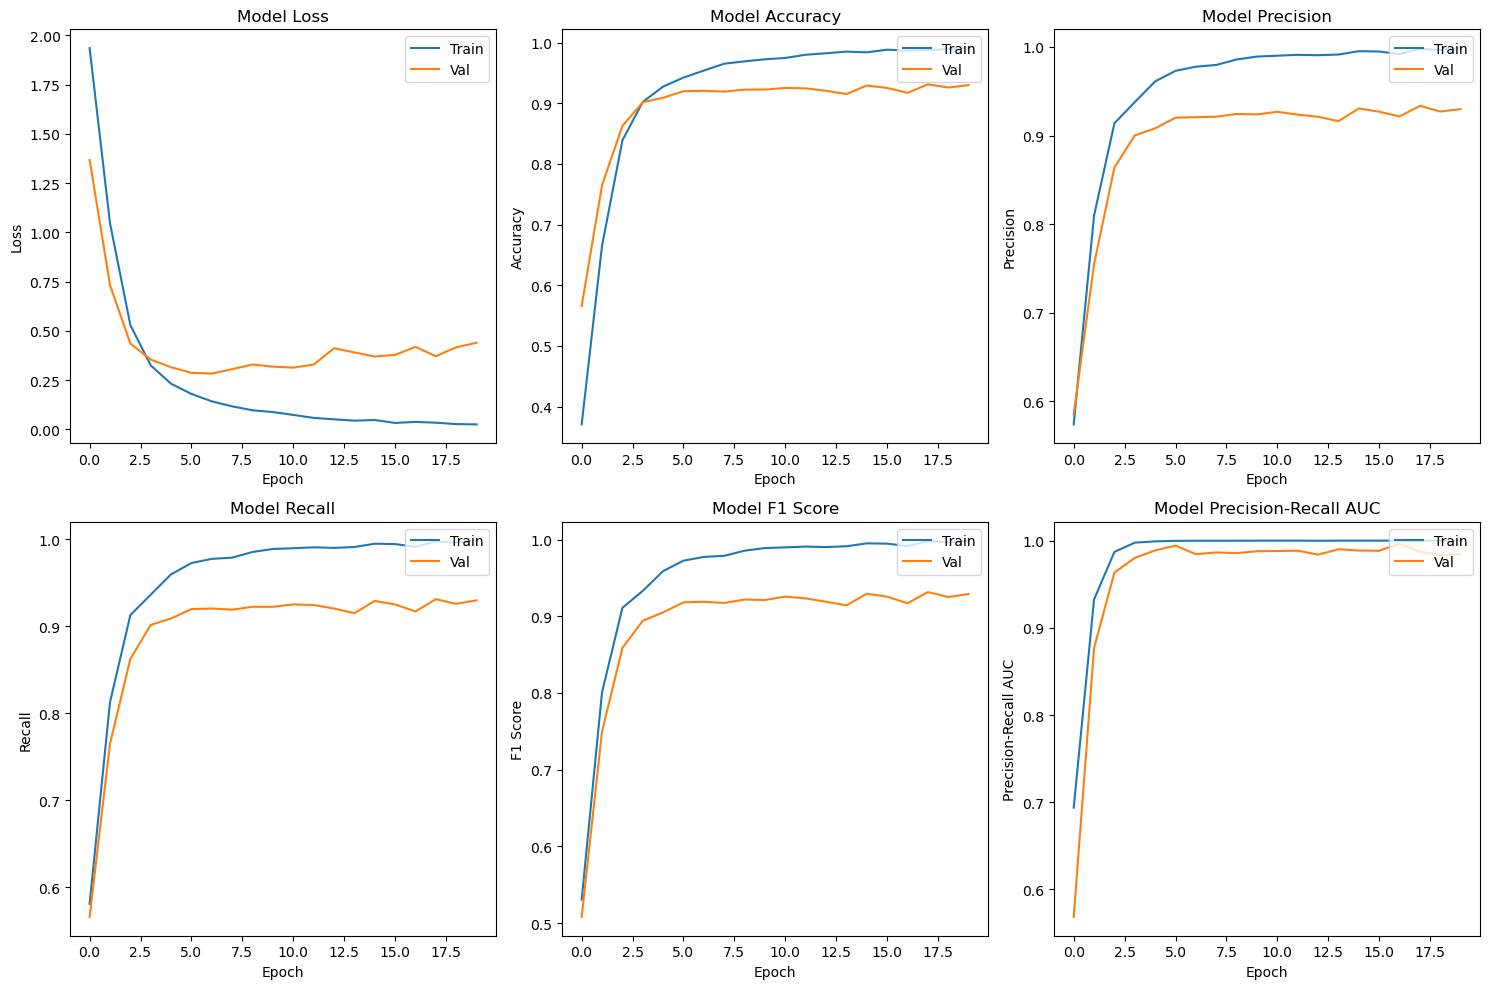

,train_loss,dev_loss,train_accuracy,dev_accuracy,train_precision,dev_precision,train_recall,dev_recall,train_f1_score,dev_f1_score,train_pr_auc,dev_pr_auc,Epoch
0,1.935587,1.368066,0.370710,0.565949,0.574118,0.585577,0.581006,0.565949,0.530479,0.508007,0.693702,0.568448,1
1,1.047084,0.732915,0.665209,0.765141,0.809783,0.754973,0.812752,0.765141,0.800872,0.749676,0.932643,0.876969,2
2,0.530006,0.436107,0.838829,0.862719,0.913939,0.864055,0.913022,0.862719,0.911031,0.858630,0.987074,0.963340,3
3,0.325299,0.355000,0.902339,0.901750,0.937811,0.900164,0.936491,0.901750,0.933184,0.894253,0.997675,0.980285,4
4,0.232108,0.315806,0.927574,0.909152,0.961126,0.908194,0.959960,0.909152,0.958985,0.905112,0.999191,0.988801,5
5,0.180315,0.287296,0.942379,0.919919,0.973082,0.920178,0.972914,0.919919,0.972520,0.918217,0.999762,0.994258,6
6,0.142662,0.283634,0.953987,0.920592,0.977739,0.920702,0.977709,0.920592,0.977477,0.918929,0.999871,0.984408,7
7,0.117108,0.305997,0.965259,0.919246,0.979686,0.921311,0.979139,0.919246,0.978876,0.917401,0.999926,0.986485,8
8,0.097460,0.329720,0.969129,0.922611,0.985887,0.924363,0.985616,0.922611,0.985552,0.921861,0.999939,0.985658,9
9,0.088301,0.318831,0.972577,0.922611,0.989195,0.923927,0.989065,0.922611,0.988992,0.921247,0.999986,0.987859,10


In [ ]:
# Define input shape
input_shape = (5, 300)

# Create a Sequential model
model = Sequential(name='Bidirectional_GRU')

# First GRU layer
model.add(Bidirectional(GRU(150, return_sequences=True), input_shape=input_shape))
model.add(Dropout(0.45))

# Second GRU layer
model.add(Bidirectional(GRU(150, return_sequences=False)))
model.add(Dropout(0.45))

# Additional Dense layer
model.add(Dense(200, activation='relu'))
# Output layer
model.add(Dense(16, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=["categorical_crossentropy", "categorical_accuracy"])

# Assuming MetricsCallback is defined elsewhere in your code
# Create the metrics callback
metrics_callback = MetricsCallback((X_train, Y_train, X_val, Y_val), plot_results=False)

# Model summary
model.summary()

# Train the model
num_epochs = 20
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=num_epochs, batch_size=128, callbacks=[metrics_callback])

# Plotting the metrics
multi_plot_all_metrics(metrics_callback.metrics_data)

display(metrics_callback.get_metrics_dataframe())

# **CNN**

In [ ]:
X_train[0].shape

(1500,)

In [ ]:
# Define a function to create the model, required for KerasClassifier
def create_model(filters=128, kernel_size=4, dense_units=512, layers=1, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    input_shape = (5, 300)
    model.add(Input(shape=input_shape))
    model.add(Dropout(dropout_rate))
    for _ in range(layers):
        model.add(Conv1D(filters, kernel_size, activation='relu', padding='valid'))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(16, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=learning_rate),
                  metrics=["categorical_accuracy"])
    return model

# Create the KerasClassifier wrapper
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid to search
param_dist = {
    'filters': [64, 128],
    'dense_units': [256, 512],
    'kernel_size_layers': [ (4,1), (2,2), (1,4) ],  # Pairs of kernel_size and layers
    'dropout_rate': [0.2, 0.3],
    'learning_rate': [0.001, 0.0001, 0.00001],
    'batch_size': [64, 128],
    'epochs': [10]
}

# Adjust the create_model function to handle kernel_size and layers pair
def create_model_with_pairs(filters=128, kernel_size_layers=(4, 1), dense_units=512, dropout_rate=0.3, learning_rate=0.001):
    kernel_size, layers = kernel_size_layers
    model = Sequential()
    input_shape = (5, 300)
    model.add(Input(shape=input_shape))
    model.add(Dropout(dropout_rate))
    for _ in range(layers):
        model.add(Conv1D(filters, kernel_size, activation='relu', padding='valid'))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(16, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=learning_rate),
                  metrics=["categorical_accuracy"])
    return model

# Create the KerasClassifier wrapper with the adjusted function
model = KerasClassifier(build_fn=create_model_with_pairs, verbose=0)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=1, scoring='f1', cv=2, verbose=1, n_jobs=-1)

# Fit the random search model
# Assuming X_train, Y_train are defined and preprocessed properly
random_search_result = random_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))

# Extract the best model from random search
best_model = random_search_result.best_estimator_.model

# Print the summary of the best model
best_model.summary()

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/tmp/ipykernel_15229/872431927.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)
/tmp/ipykernel_15229/872431927.py:57: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model_with_pairs, verbose=0)


KeyboardInterrupt: 

In [ ]:
FILTERS = 128
KERNEL = 4 # trigram
DENSE = 512
LAYERS = 1

# create empty sequential model
cnn_3gram = Sequential()

# Input shape is (5, 300)
input_shape = (5, 300)

# Add an Input layer
cnn_3gram.add(Input(shape=input_shape))

# add 0.3 dropout probability
cnn_3gram.add(Dropout(0.3))

# add a stack of 5 convolution layers. In CNN layers we avoid to use dropout
for _ in range(LAYERS):
  cnn_3gram.add(Conv1D(FILTERS, KERNEL, activation='relu', padding='valid'))

# max pooling => Here a fixed size representation is created
cnn_3gram.add(GlobalMaxPooling1D())

# add 0.3 dropout probability
cnn_3gram.add(Dropout(0.3))

# add dense layer
cnn_3gram.add(Dense(DENSE, activation='relu'))

# add final linear layer
cnn_3gram.add(Dense(16, activation='softmax'))

cnn_3gram.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=["categorical_accuracy"])

early_stopping = EarlyStopping(patience=10, verbose=2, monitor="val_loss", mode="min", restore_best_weights=True)

# Create the metrics callback (assuming MetricsCallback is defined elsewhere in your code)
metrics_callback = MetricsCallback((X_train, Y_train, X_val, Y_val), plot_results=False)

# Model summary
cnn_3gram.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 5, 300)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 128)            153728    
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               66048     
                                                                 
 dense_7 (Dense)             (None, 16)                8208      
                                                      

Epoch 1/20
93/93 [==============================] - 3s 24ms/step - loss: 1.5724 - categorical_accuracy: 0.5203 - val_loss: 0.8785 - val_categorical_accuracy: 0.7369
Epoch 2/20
93/93 [==============================] - 2s 22ms/step - loss: 0.7777 - categorical_accuracy: 0.7590 - val_loss: 0.5542 - val_categorical_accuracy: 0.8365
Epoch 3/20
93/93 [==============================] - 2s 22ms/step - loss: 0.5589 - categorical_accuracy: 0.8272 - val_loss: 0.4602 - val_categorical_accuracy: 0.8546
Epoch 4/20
93/93 [==============================] - 2s 22ms/step - loss: 0.4404 - categorical_accuracy: 0.8633 - val_loss: 0.4229 - val_categorical_accuracy: 0.8762
Epoch 5/20
93/93 [==============================] - 2s 22ms/step - loss: 0.3793 - categorical_accuracy: 0.8791 - val_loss: 0.3903 - val_categorical_accuracy: 0.8782
Epoch 6/20
93/93 [==============================] - 2s 22ms/step - loss: 0.3238 - categorical_accuracy: 0.8956 - val_loss: 0.3674 - val_categorical_accuracy: 0.8856
Epoch 7/20

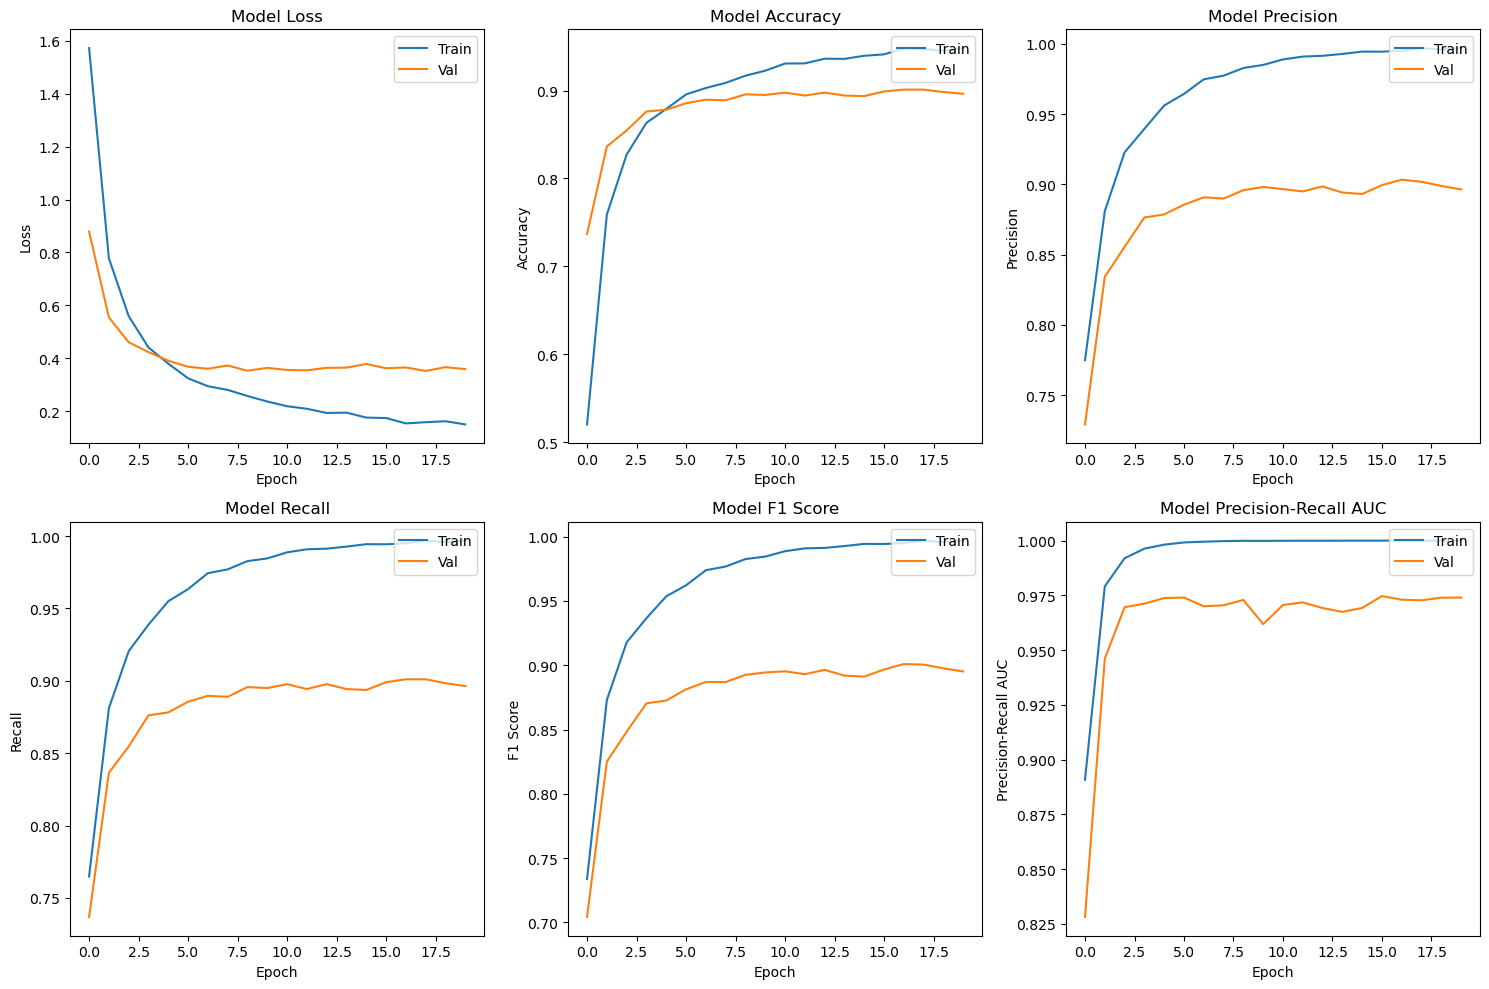

,train_loss,dev_loss,train_accuracy,dev_accuracy,train_precision,dev_precision,train_recall,dev_recall,train_f1_score,dev_f1_score,train_pr_auc,dev_pr_auc,Epoch
0,1.572376,0.878529,0.520273,0.736878,0.774861,0.729184,0.764805,0.736878,0.733787,0.704292,0.890822,0.828189,1
1,0.777708,0.554232,0.759001,0.836474,0.881000,0.834159,0.881057,0.836474,0.872897,0.825062,0.979118,0.946119,2
2,0.558939,0.460185,0.827221,0.854643,0.922800,0.855546,0.920508,0.854643,0.917803,0.848260,0.991977,0.969612,3
3,0.440418,0.422879,0.863308,0.876178,0.939495,0.876412,0.938846,0.876178,0.936563,0.870366,0.996346,0.971222,4
4,0.379296,0.390345,0.879122,0.878196,0.956129,0.878604,0.954997,0.878197,0.953565,0.872571,0.998178,0.973787,5
5,0.323774,0.367425,0.895609,0.885599,0.964381,0.885540,0.963408,0.885599,0.962148,0.881270,0.999180,0.973995,6
6,0.293997,0.360093,0.902927,0.889637,0.974737,0.890785,0.974428,0.889637,0.973882,0.886953,0.999534,0.970013,7
7,0.279906,0.372205,0.908816,0.888964,0.977343,0.889863,0.977036,0.888964,0.976751,0.886900,0.999785,0.970502,8
8,0.256905,0.352481,0.916891,0.895693,0.982792,0.895846,0.982756,0.895693,0.982554,0.892528,0.999921,0.972919,9
9,0.236092,0.363280,0.922611,0.895020,0.984994,0.898153,0.984606,0.895020,0.984473,0.894370,0.999899,0.961869,10


In [ ]:

# Train the model
num_epochs = 20
history = cnn_3gram.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=num_epochs, batch_size=128, callbacks=[metrics_callback,early_stopping],
                        shuffle=True)

# Plotting the metrics
multi_plot_all_metrics(metrics_callback.metrics_data)

display(metrics_callback.get_metrics_dataframe())

47/47 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

        PART       0.59      0.68      0.63        44
       PUNCT       0.94      0.93      0.93        84
         NUM       0.88      0.72      0.79        61
       CCONJ       0.86      0.74      0.79        42
           X       0.88      0.96      0.92        54
        VERB       0.92      0.91      0.91       225
        PRON       1.00      0.33      0.50         6
         DET       0.88      0.89      0.89       190
       SCONJ       0.80      0.80      0.80         5
         ADJ       1.00      0.92      0.96        25
         ADV       0.93      0.88      0.90       116
        INTJ       0.88      0.96      0.91        45
        NOUN       0.98      1.00      0.99       238
         ADP       0.87      0.93      0.90        88
         AUX       0.90      0.92      0.91       261
       PROPN       1.00      0.50      0.67         2

    accuracy               

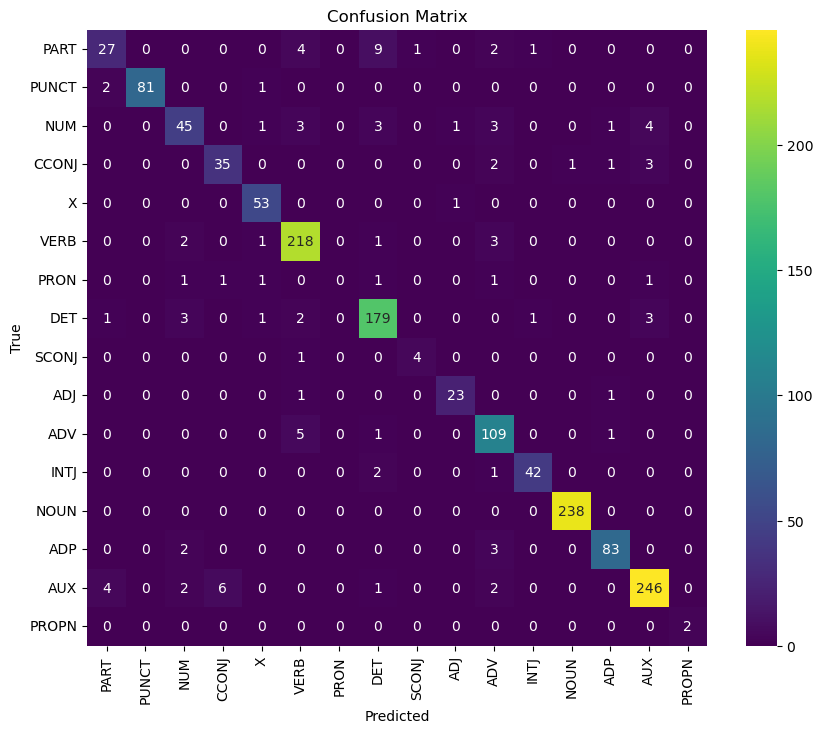

In [ ]:
# Assuming Y_test is one-hot encoded, convert it to class labels
Y_test_labels = np.argmax(Y_test, axis=1)

# Get predictions
predictions = np.argmax(cnn_3gram.predict(X_test), -1)

# Print classification report
print(classification_report(Y_test_labels, predictions, target_names=total_classes))

# Plot confusion matrix with a stronger color palette
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=total_classes, yticklabels=total_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Multi-filter CNN

In [ ]:
FILTERS = 128
KERNEL = 4 # trigram
DENSE = 512
LAYERS = 1

# Input shape is (5, 300)
input_shape = (5, 300)

# Add an Input layer
input_layer = Input(shape=input_shape)

# Dropout over Embeddings
dropped_embeddings = Dropout(rate=0.2)(input_layer)

# Multi-filter CNNs
pooled_convs = []
filter_sizes = [2,3,4]

for n_gram in filter_sizes:
    # n-gram convolutions with padding
    convs = Conv1D(filters=FILTERS, kernel_size=n_gram, strides=1,
                    padding="same", activation='relu',
                    name='{}-gram_Convolutions'.format(n_gram))(dropped_embeddings)
    convs2 = Conv1D(filters=FILTERS, kernel_size=n_gram, strides=1,
                    padding="same", activation='relu',
                    name='{}-gram_Convolutions_2'.format(n_gram))(convs)
    convs3 = Conv1D(filters=FILTERS, kernel_size=n_gram, strides=1,
                    padding="same", activation='relu',
                    name='{}-gram_Convolutions_3'.format(n_gram))(convs2)


    # Max-Pooling over time
    pooled_convs.append(GlobalMaxPooling1D(name='{}-gram_MaxPool'.format(n_gram))(convs3))

# Concatenation of filters form all window sizes
concat =  concatenate(pooled_convs)
concat = Dropout(rate=0.5)(concat)
outputs = Dense(16, activation='softmax')(concat)

multi_cnn = Model(inputs=input_layer, outputs=outputs)

multi_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=["categorical_accuracy"])

# Create the metrics callback (assuming MetricsCallback is defined elsewhere in your code)
metrics_callback = MetricsCallback((X_train, Y_train, X_val, Y_val), plot_results=False)

print(multi_cnn.summary())

history_multi_cnn = multi_cnn.fit(X_train, Y_train,
              validation_data=(X_val, Y_val),
              batch_size=128,
              epochs=20,
              shuffle=True,
              callbacks=[metrics_callback,early_stopping])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 5, 300)]     0           []                               
                                                                                                  
 dropout_10 (Dropout)           (None, 5, 300)       0           ['input_7[0][0]']                
                                                                                                  
 2-gram_Convolutions (Conv1D)   (None, 5, 128)       76928       ['dropout_10[0][0]']             
                                                                                                  
 3-gram_Convolutions (Conv1D)   (None, 5, 128)       115328      ['dropout_10[0][0]']             
                                                                                              

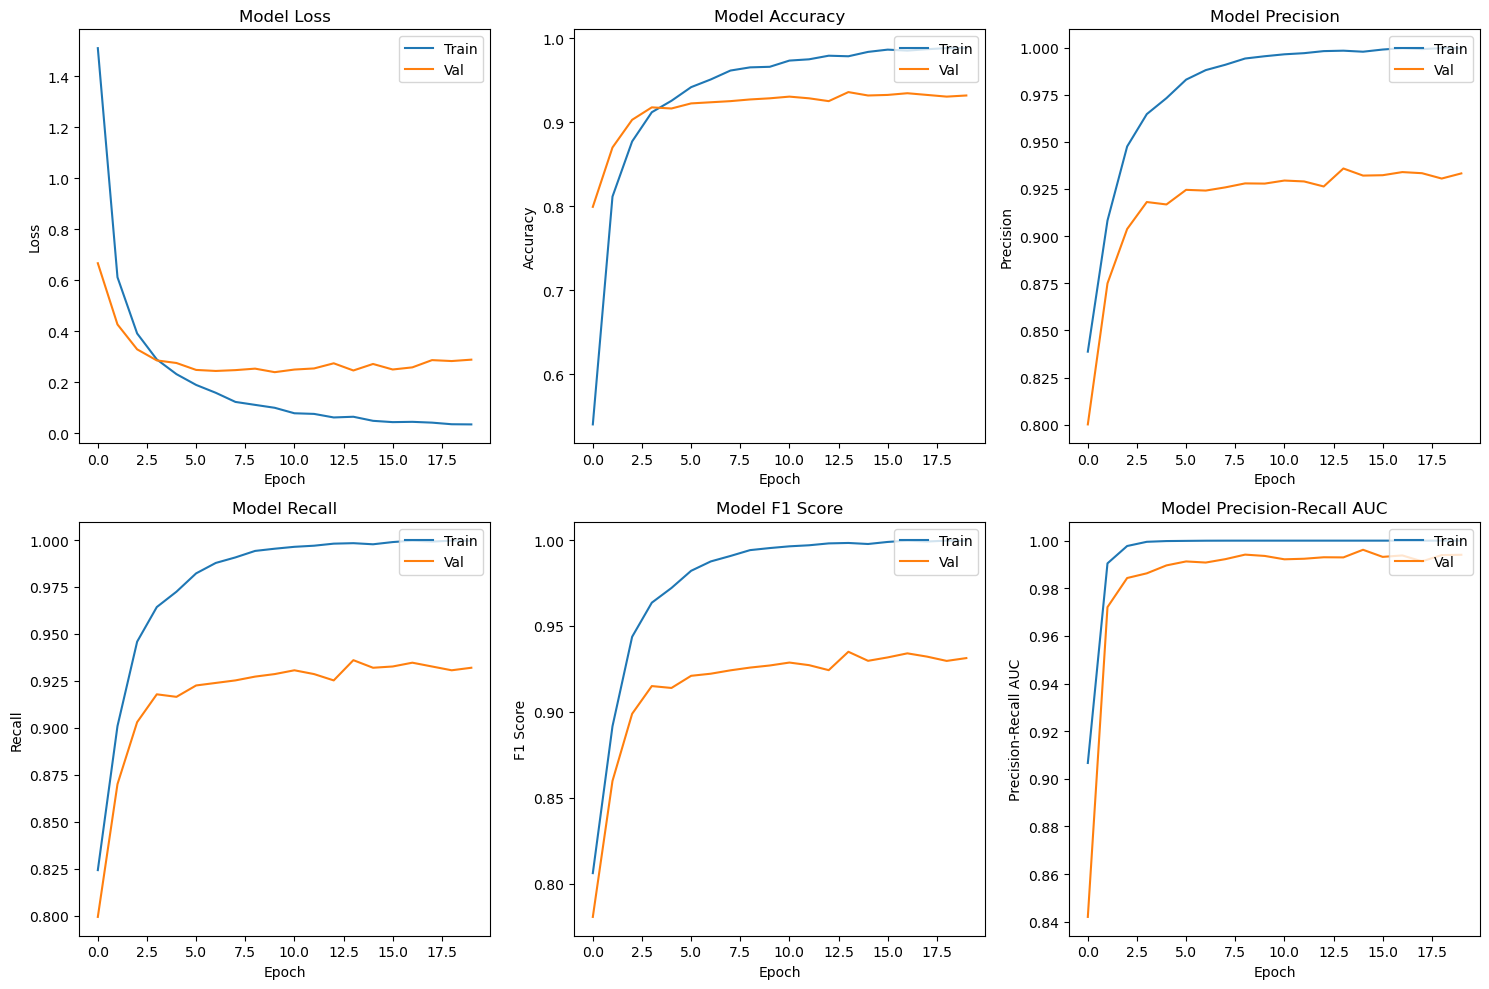

,train_loss,dev_loss,train_accuracy,dev_accuracy,train_precision,dev_precision,train_recall,dev_recall,train_f1_score,dev_f1_score,train_pr_auc,dev_pr_auc,Epoch
0,1.511098,0.667602,0.540461,0.799462,0.838756,0.800183,0.824361,0.799462,0.806069,0.780580,0.906650,0.842016,1
1,0.612551,0.427428,0.811659,0.870121,0.908257,0.874970,0.900993,0.870121,0.891569,0.859739,0.990461,0.972080,2
2,0.392098,0.329863,0.877355,0.903096,0.947526,0.903773,0.945912,0.903096,0.943689,0.898859,0.997747,0.984310,3
3,0.290229,0.286388,0.912096,0.917900,0.964691,0.918084,0.964334,0.917900,0.963540,0.914985,0.999517,0.986277,4
4,0.232607,0.276311,0.925723,0.916555,0.973162,0.916797,0.972493,0.916555,0.972101,0.913890,0.999826,0.989606,5
5,0.190310,0.249106,0.941958,0.922611,0.982971,0.924543,0.982251,0.922611,0.982107,0.920962,0.999905,0.991273,6
6,0.159435,0.245060,0.951127,0.923957,0.988025,0.924153,0.987803,0.923957,0.987562,0.922188,0.999975,0.990805,7
7,0.123609,0.248321,0.961726,0.925303,0.990875,0.925863,0.990747,0.925303,0.990741,0.924149,0.999994,0.992237,8
8,0.112039,0.254154,0.965511,0.927322,0.994167,0.927961,0.994196,0.927322,0.994147,0.925752,1.000000,0.994133,9
9,0.100586,0.240298,0.966184,0.928668,0.995379,0.927855,0.995373,0.928668,0.995347,0.926970,0.999998,0.993579,10


In [ ]:
# Plotting the metrics
multi_plot_all_metrics(metrics_callback.metrics_data)

display(metrics_callback.get_metrics_dataframe())

47/47 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

        PART       0.79      0.61      0.69        44
       PUNCT       1.00      0.96      0.98        84
         NUM       0.82      0.74      0.78        61
       CCONJ       0.83      0.83      0.83        42
           X       0.91      0.98      0.95        54
        VERB       0.93      0.97      0.95       225
        PRON       0.00      0.00      0.00         6
         DET       0.91      0.94      0.93       190
       SCONJ       0.80      0.80      0.80         5
         ADJ       0.92      0.92      0.92        25
         ADV       0.87      0.94      0.90       116
        INTJ       0.95      0.93      0.94        45
        NOUN       1.00      1.00      1.00       238
         ADP       0.95      0.94      0.95        88
         AUX       0.96      0.94      0.95       261
       PROPN       1.00      1.00      1.00         2

    accuracy               

/home/jason-server/miniconda3/envs/ta/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jason-server/miniconda3/envs/ta/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jason-server/miniconda3/envs/ta/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

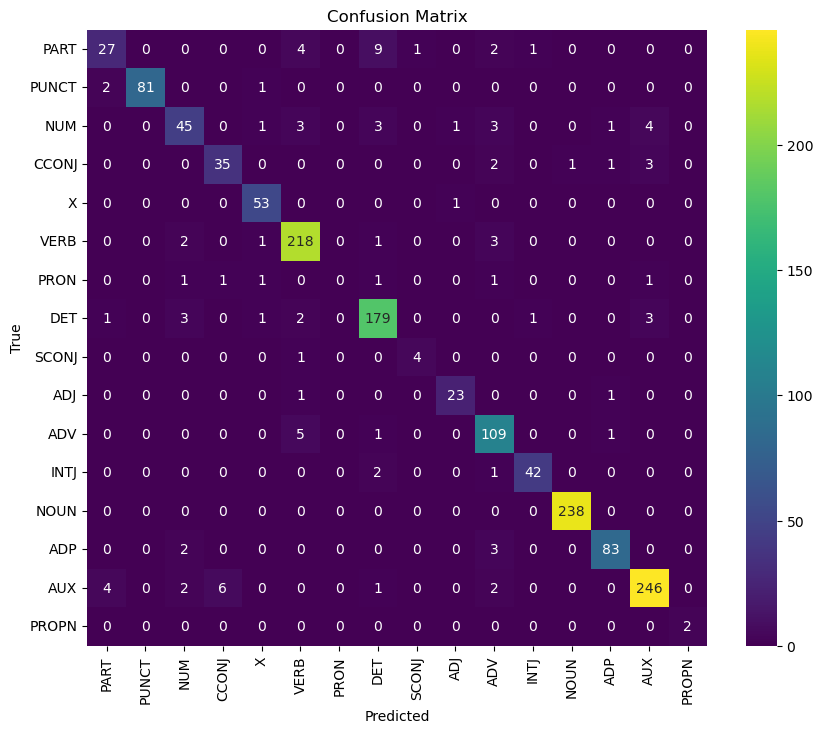

In [ ]:
# Assuming Y_test is one-hot encoded, convert it to class labels
Y_test_labels = np.argmax(Y_test, axis=1)

# Get predictions
predictions = np.argmax(multi_cnn.predict(X_test), -1)

# Print classification report
print(classification_report(Y_test_labels, predictions, target_names=total_classes))

# Generate confusion matrix
cm = confusion_matrix(Y_test_labels, predictions)

# Plot confusion matrix with a stronger color palette
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=total_classes, yticklabels=total_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## here we will check the performance when also adding Residual Connections

In [ ]:
#Create and train a CNN model with (2,3,4)-gram filters using Keras functional API
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalMaxPooling1D, Conv1D, concatenate, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

FILTERS = 128
KERNEL = 4 # trigram
DENSE = 512
LAYERS = 1

# Input shape is (5, 300)
input_shape = (5, 300)

# Add an Input layer
input_layer = Input(shape=input_shape)

# Dropout over Embeddings
dropped_embeddings = Dropout(rate=0.2)(input_layer)

# Multi-filter CNNs
pooled_convs = []
filter_sizes = [2,3,4]

for n_gram in filter_sizes:
    # n-gram convolutions with padding
    convs = Conv1D(filters=FILTERS, kernel_size=n_gram, strides=1,
                    padding="same", activation='relu',
                    name='{}-gram_Convolutions'.format(n_gram))(dropped_embeddings)
    convs2 = Conv1D(filters=FILTERS, kernel_size=n_gram, strides=1,
                    padding="same", activation='relu',
                    name='{}-gram_Convolutions_2'.format(n_gram))(convs)
    convs3 = Conv1D(filters=FILTERS, kernel_size=n_gram, strides=1,
                    padding="same", activation='relu',
                    name='{}-gram_Convolutions_3'.format(n_gram))(convs2)

    # Residual connection from the original input
    residual = Add()([convs, convs3])

    # Max-Pooling over time
    pooled_convs.append(GlobalMaxPooling1D(name='{}-gram_MaxPool'.format(n_gram))(residual))

# Concatenation of filters form all window sizes
concat =  concatenate(pooled_convs)
concat = Dropout(rate=0.5)(concat)
outputs = Dense(16, activation='softmax')(concat)

multi_cnn = Model(inputs=input_layer, outputs=outputs)

multi_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=["categorical_accuracy"])

# Create the metrics callback (assuming MetricsCallback is defined elsewhere in your code)
metrics_callback = MetricsCallback((X_train, Y_train, X_val, Y_val), plot_results=False)

print(multi_cnn.summary())

history_multi_cnn = multi_cnn.fit(X_train, Y_train,
              validation_data=(X_val, Y_val),
              batch_size=128,
              epochs=20,
              shuffle=True,
              callbacks=[metrics_callback,early_stopping])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 5, 300)]     0           []                               
                                                                                                  
 dropout_13 (Dropout)           (None, 5, 300)       0           ['input_9[0][0]']                
                                                                                                  
 2-gram_Convolutions (Conv1D)   (None, 5, 128)       76928       ['dropout_13[0][0]']             
                                                                                                  
 3-gram_Convolutions (Conv1D)   (None, 5, 128)       115328      ['dropout_13[0][0]']             
                                                                                            

47/47 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

        PART       0.80      0.64      0.71        44
       PUNCT       0.96      0.96      0.96        84
         NUM       0.83      0.82      0.83        61
       CCONJ       0.79      0.79      0.79        42
           X       0.92      1.00      0.96        54
        VERB       0.94      0.96      0.95       225
        PRON       1.00      0.17      0.29         6
         DET       0.92      0.95      0.94       190
       SCONJ       1.00      0.80      0.89         5
         ADJ       0.96      0.92      0.94        25
         ADV       0.94      0.91      0.93       116
        INTJ       0.88      0.98      0.93        45
        NOUN       1.00      1.00      1.00       238
         ADP       0.93      0.95      0.94        88
         AUX       0.96      0.95      0.95       261
       PROPN       1.00      1.00      1.00         2

    accuracy               

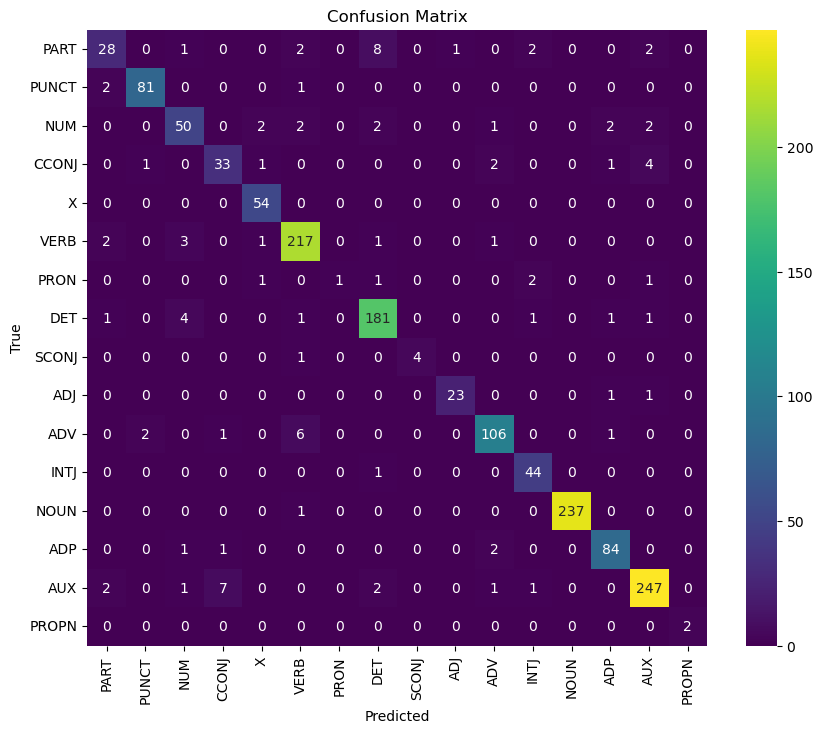

In [ ]:
# Assuming Y_test is one-hot encoded, convert it to class labels
Y_test_labels = np.argmax(Y_test, axis=1)

# Get predictions
predictions = np.argmax(multi_cnn.predict(X_test), -1)

# Print classification report
print(classification_report(Y_test_labels, predictions, target_names=total_classes))

# Generate confusion matrix
cm = confusion_matrix(Y_test_labels, predictions)

# Plot confusion matrix with a stronger color palette
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=total_classes, yticklabels=total_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()